In [ ]:
# Import the required packages
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# Setup kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d sunnykakar/shoes-dataset-real-and-ai-generated-images
! unzip shoes-dataset-real-and-ai-generated-images.zip -d images

 67% 25.0M/37.2M [00:00<00:00, 106MB/s]
100% 37.2M/37.2M [00:00<00:00, 133MB/s]
Archive:  shoes-dataset-real-and-ai-generated-images.zip
  inflating: images/LICENSE          
  inflating: images/README.md        
  inflating: images/ai-midjourney/aadwlchsdhy.jpg  
  inflating: images/ai-midjourney/aaidtlwuezt.jpg  
  inflating: images/ai-midjourney/abgdjvgwjym.jpg  
  inflating: images/ai-midjourney/acaepajyzuu.jpg  
  inflating: images/ai-midjourney/acnwnitrdrm.jpg  
  inflating: images/ai-midjourney/adkwdhfulmy.jpg  
  inflating: images/ai-midjourney/adswvmoymdh.jpg  
  inflating: images/ai-midjourney/aeheiwyinva.jpg  
  inflating: images/ai-midjourney/aeptapltanf.jpg  
  inflating: images/ai-midjourney/aetfmeycjid.jpg  
  inflating: images/ai-midjourney/affqhqolhvi.jpg  
  inflating: images/ai-midjourney/afnjqggzcbj.jpg  
  inflating: images/ai-midjourney/agshkoujown.jpg  
  inflating: images/ai-midjourney/ahaevflguwr.jpg  
  inflating: images/ai-midjourney/ahhgblpoqwp.jpg  
  infla

In [ ]:
# Specify the path to your image folders
image_folder = "images"

# Initialize empty lists to store images and their corresponding labels
images = []
labels = []

# Iterate through subfolders (classes)
for class_name in os.listdir(image_folder):
    class_path = os.path.join(image_folder, class_name)
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            try:
                # Open and load the image
                with Image.open(image_path) as img:
                    # Convert the image to a NumPy array
                    img_array = np.array(img)
                    # Append the image array to the list of images
                    images.append(img_array)
                    # Append the label corresponding to the folder
                    labels.append(class_name)
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Convert the lists of images and labels into NumPy arrays
images_array = np.array(images)
labels_array = np.array(labels)

# Print the shapes of the resulting arrays
print("Shape of images array:", images_array.shape)
print("Shape of labels array:", labels_array.shape)

Shape of images array: (2181, 240, 240, 3)
Shape of labels array: (2181,)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 238, 238, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 236, 236, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 236, 236, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 118, 118, 32)      0         
 D)                                                              
                                                        

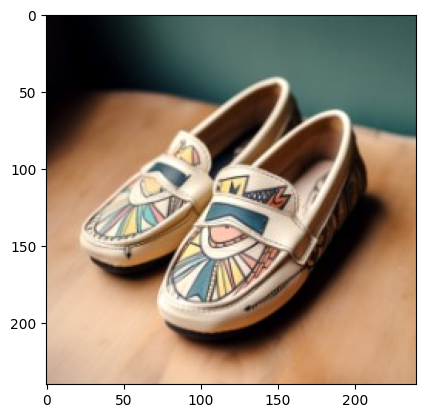

In [ ]:
# Display one image of the dataset
plt.imshow(images_array[3])


# Transform the labels of folder name into binary representations
binary_labels = []

for x in labels_array:
    if x == 'ai-midjourney':
        binary_labels.append(0)
    else:
         binary_labels.append(1)

binary_labels = np.array(binary_labels)


# Define a CNN model using Keras
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(240, 240, 3)),  # 238 x 238 x 32
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),  # 236 x 236 x 32
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),  # 118 x 118 x 32
    layers.Conv2D(64, (3, 3), activation='relu'),  # 116 x 116 x 64
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),  # 114 x 114 x 64
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),  # 57 x 57 x 64
    layers.Conv2D(128, (3, 3), activation='relu'),  # 55 x 55 x 128
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),  # 53 x 53 x 128
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),  # 26 x 26 x 128
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Show the model summary
model.summary()

# Compile the model
model.compile(optimizer='Adam',loss= 'binary_crossentropy',metrics=['accuracy'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 6.1 MB/s eta 0:00:00


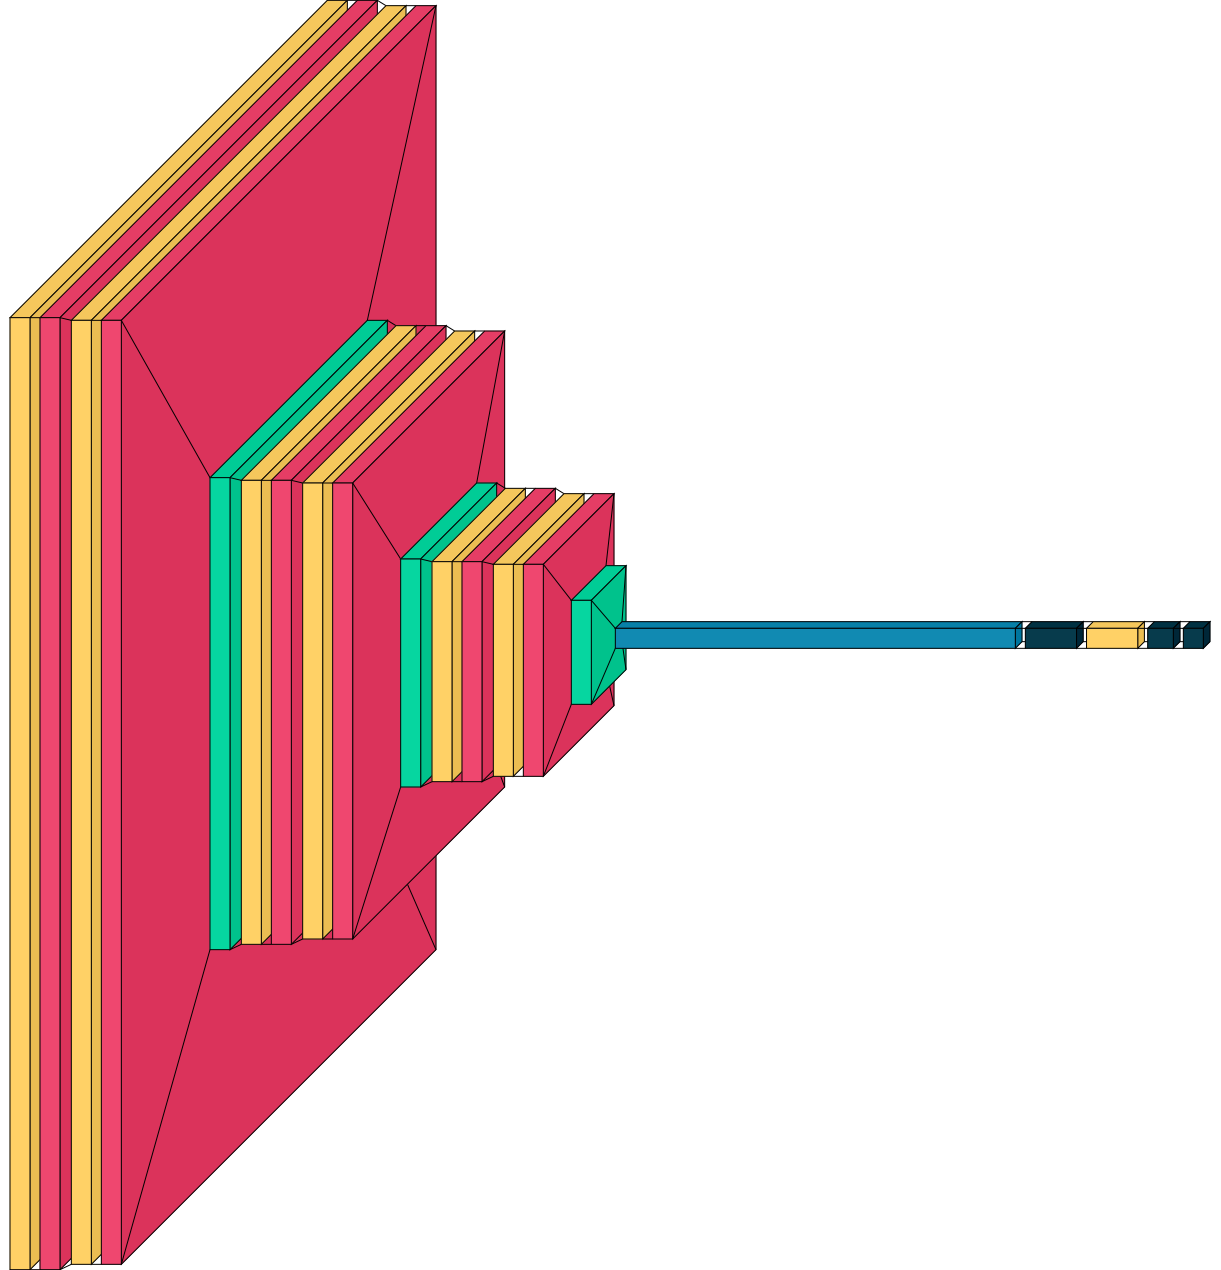

In [ ]:
! pip install visualkeras
import visualkeras
visualkeras.layered_view(model)

In [ ]:
# Train the model
history = model.fit(images_array, binary_labels, validation_split=0.3, epochs= 25, shuffle= True)

Epoch 1/25
48/48 [==============================] - 144s 3s/step - loss: 3.8350 - accuracy: 0.8558 - val_loss: 38.6941 - val_accuracy: 0.2702
Epoch 2/25
48/48 [==============================] - 142s 3s/step - loss: 1.5202 - accuracy: 0.9233 - val_loss: 23.8578 - val_accuracy: 0.6305
Epoch 3/25
48/48 [==============================] - 141s 3s/step - loss: 0.8656 - accuracy: 0.9397 - val_loss: 12.2630 - val_accuracy: 0.6672
Epoch 4/25
48/48 [==============================] - 145s 3s/step - loss: 0.8785 - accuracy: 0.9574 - val_loss: 1.4062 - val_accuracy: 0.9191
Epoch 5/25
48/48 [==============================] - 144s 3s/step - loss: 0.5429 - accuracy: 0.9561 - val_loss: 1.2997 - val_accuracy: 0.9618
Epoch 6/25
48/48 [==============================] - 146s 3s/step - loss: 0.3224 - accuracy: 0.9692 - val_loss: 3.7913 - val_accuracy: 0.7710
Epoch 7/25
48/48 [==============================] - 144s 3s/step - loss: 0.3465 - accuracy: 0.9771 - val_loss: 0.2990 - val_accuracy: 0.9649
Epoch 8/25

In [ ]:
# save model
model.save_weights('./shoe_model')

1/1 [==============================] - 0s 176ms/step
[[0]]
ai-midjourney


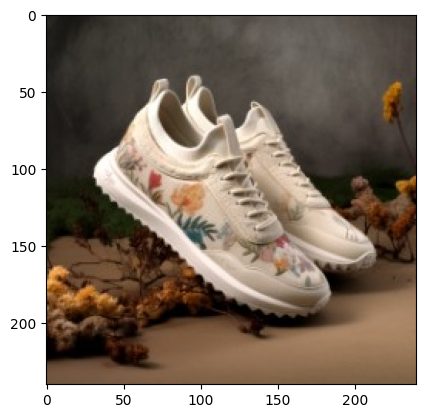

In [ ]:
# Predicting using the trained model

index = 1500

# Reshape the image to match the expected input shape
input_image = np.expand_dims(images_array[index], axis=0)

# Predict the label for the input image
prediction = (model.predict(input_image) > 0.5).astype("int32")

# Print the predicted value
print(prediction)
print(labels_array[index])

# Display one image of the dataset
plt.imshow(images_array[index])

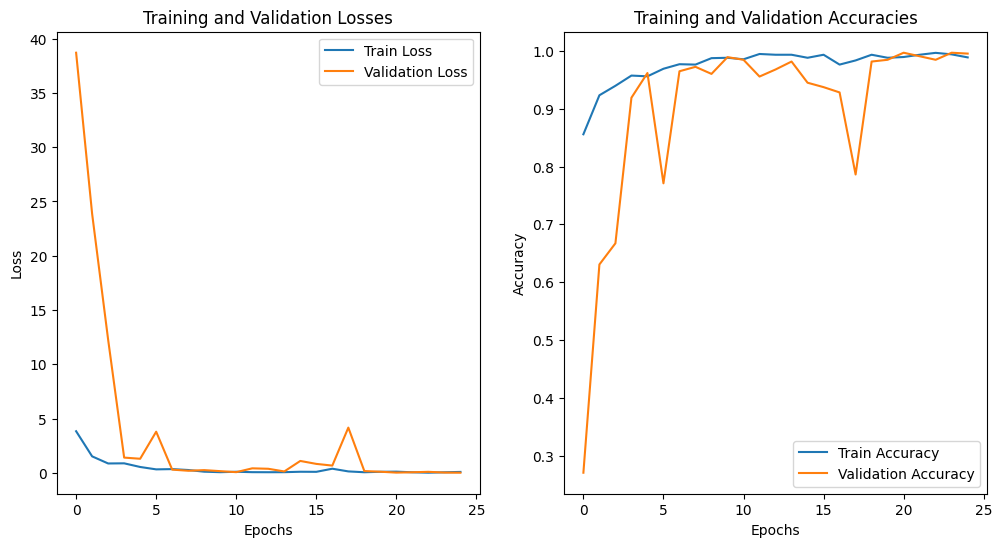

In [ ]:
plt.figure(figsize=(12, 6))

# Plotting losses
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Training and Validation Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plotting accuracies
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training and Validation Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

69/69 [==============================] - 44s 639ms/step


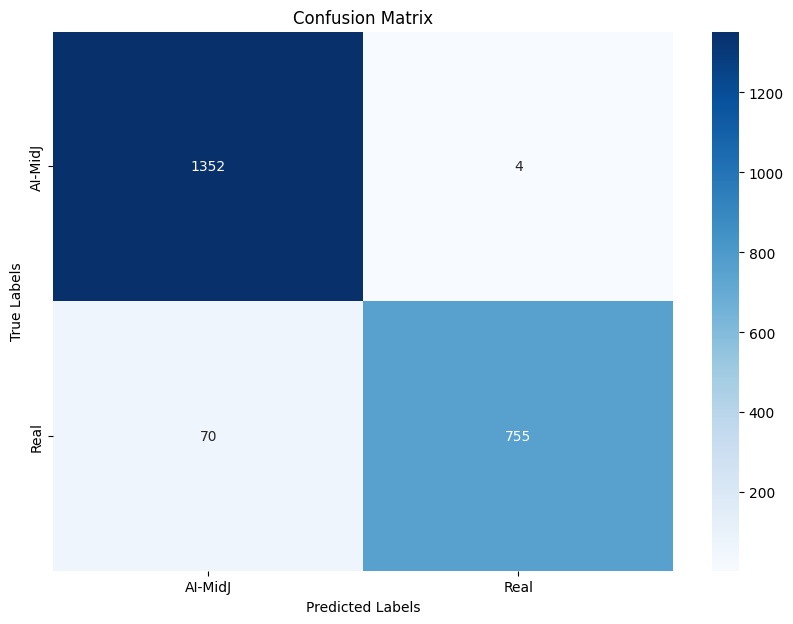

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

class_dict = {0: "AI-MidJ",1: "Real"}
y_pred_probs = model.predict(images_array)
y_pred = (y_pred_probs > 0.5).astype(int)


cm = confusion_matrix(binary_labels, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(class_dict.values()), yticklabels=list(class_dict.values()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Displaying few False Positives:
false_positives_idx = []
for i in range(len(y_pred)):
  if y_pred[i] == 0 and binary_labels[i] == 1:
    false_positives_idx.append(i)

print(false_positives_idx)

false_positive_images = images_array[false_positives_idx]
plt.figure(figsize=(12, 12))
for id, (image_idx) in enumerate(false_positives_idx[:5]):
        plt.subplot(5, 5, id + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images_array[image_idx], cmap=plt.cm.binary)
        plt.xlabel(f"True: {class_dict[binary_labels[image_idx]]}, Pred: {class_dict[y_pred[image_idx][0]]}")
plt.show()

NameError: name 'y_pred' is not defined

Lets see where the filters focused

Filters in Convolutional Layer 1: (3, 3, 3, 32)
Filters in Convolutional Layer 2: (3, 3, 32, 32)
Filters in Convolutional Layer 3: (3, 3, 32, 64)
Filters in Convolutional Layer 4: (3, 3, 64, 64)
Filters in Convolutional Layer 5: (3, 3, 64, 128)
Filters in Convolutional Layer 6: (3, 3, 128, 128)


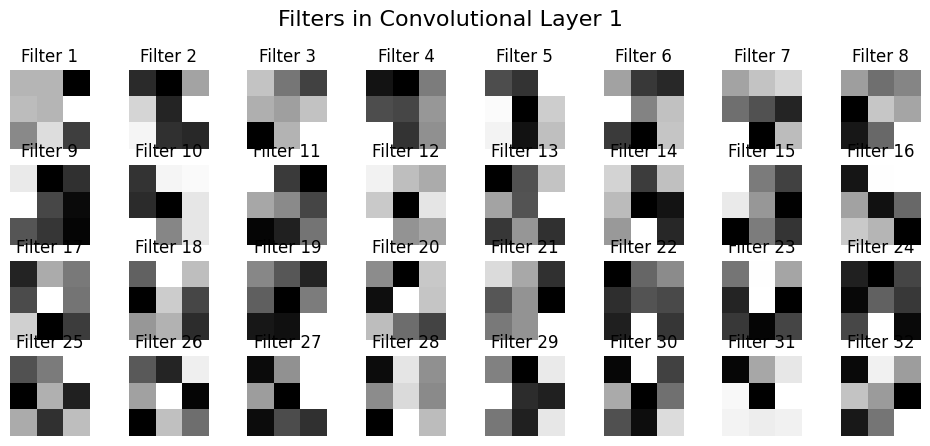

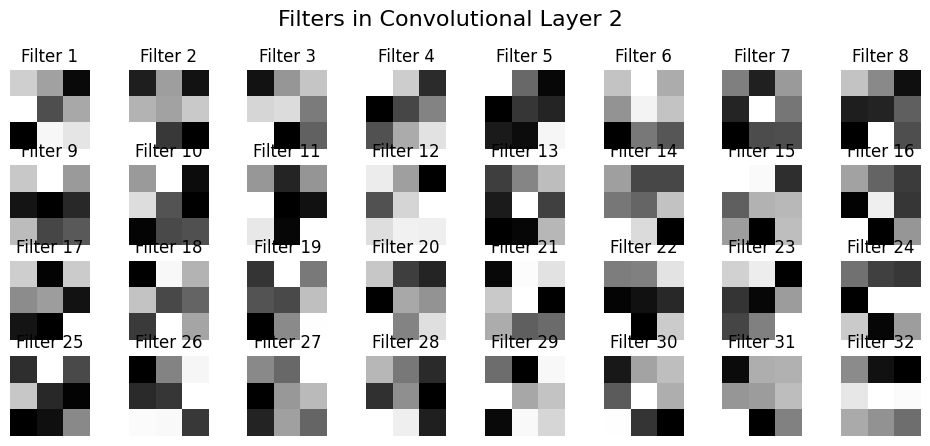

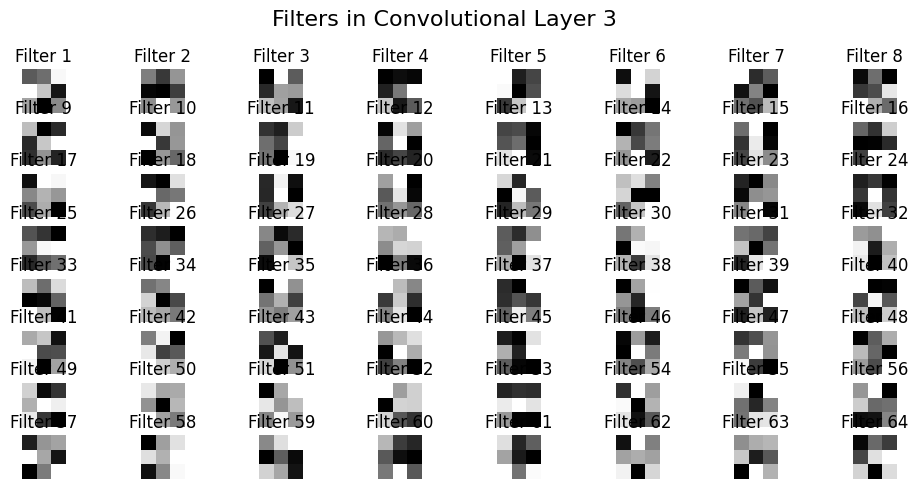

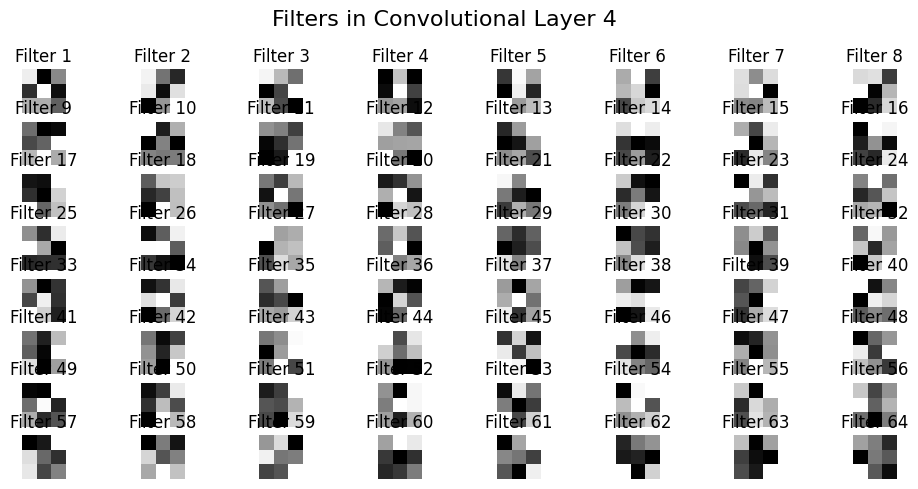

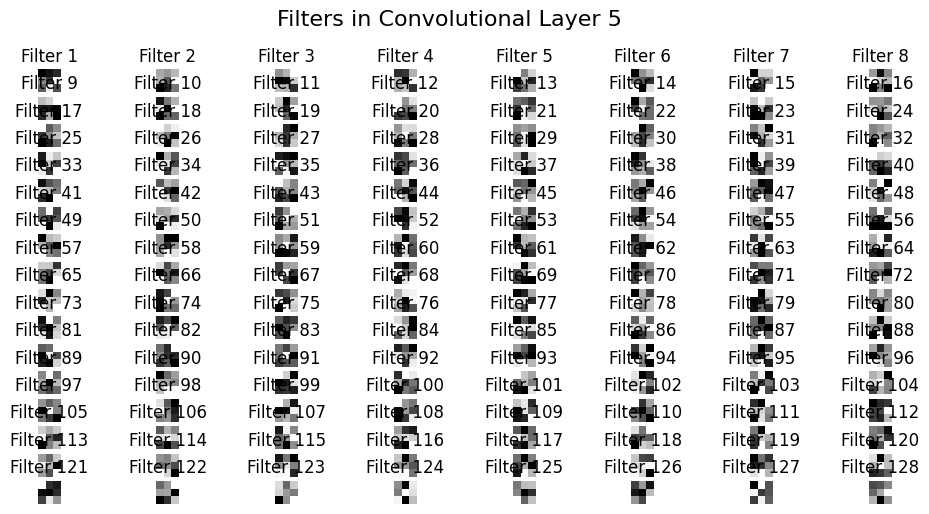

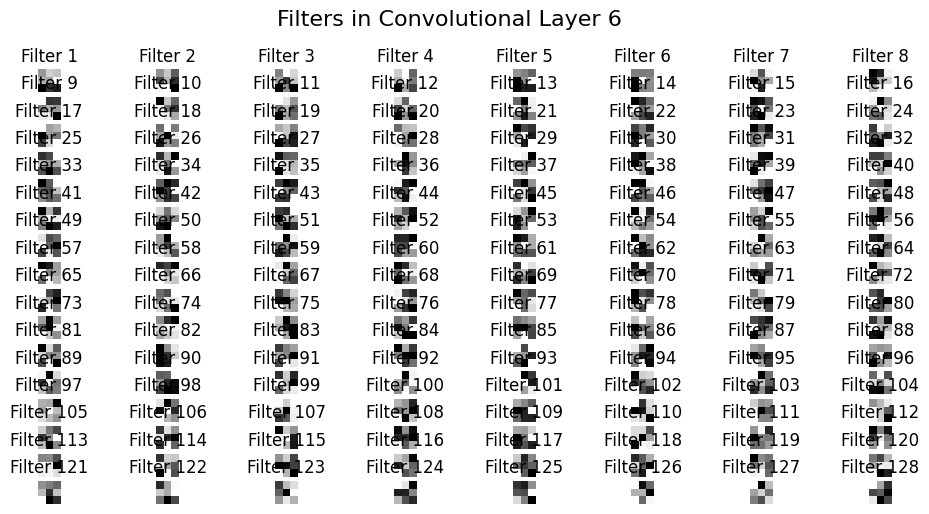

In [ ]:
def visualize_filters(conv_layers):
    for i, layer in enumerate(conv_layers, 1):
        filters = layer.get_weights()[0]
        num_filters = filters.shape[3]
        num_cols = 8
        num_rows = (num_filters // num_cols) + 1

        plt.figure(figsize=(12, 6))
        plt.suptitle(f'Filters in Convolutional Layer {i}', fontsize=16)

        for j in range(num_filters):
            plt.subplot(num_rows, num_cols, j + 1)
            plt.imshow(filters[:, :, 0, j], cmap='gray')
            plt.axis('off')
            plt.title(f'Filter {j+1}')

        plt.show()


# Get the convolutional layers in the model
conv_layers = [module for module in model.layers if isinstance(module, layers.Conv2D)]

# Print the shape of filters in each convolutional layer
# Loop through convolutional layers
for i, layer in enumerate(conv_layers):
    print(f"Filters in Convolutional Layer {i + 1}: {layer.get_weights()[0].shape}")

visualize_filters(conv_layers)

We need these to be more descriptive so we can learn what led to the false positives.


1/1 [==============================] - 0s 166ms/step


<ipython-input-12-90bae4466b3e>:34: RuntimeWarning: divide by zero encountered in divide
  x /= x.std()


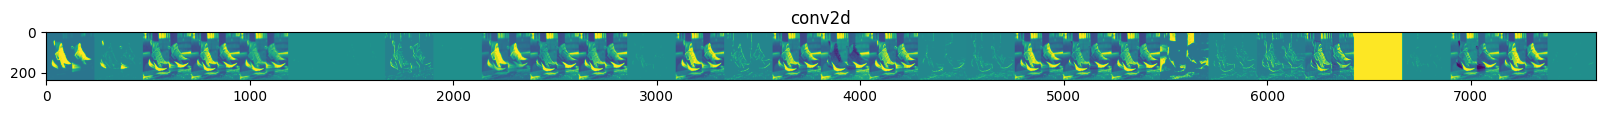

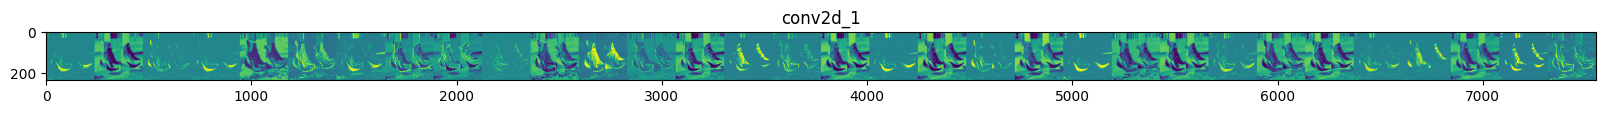

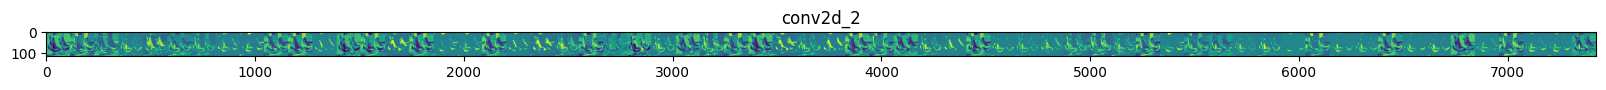

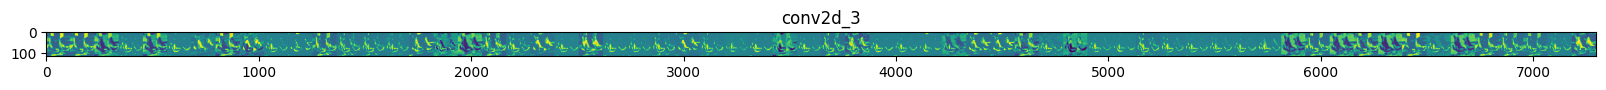

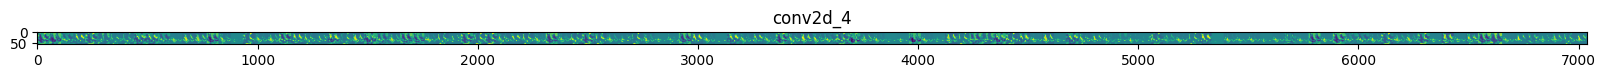

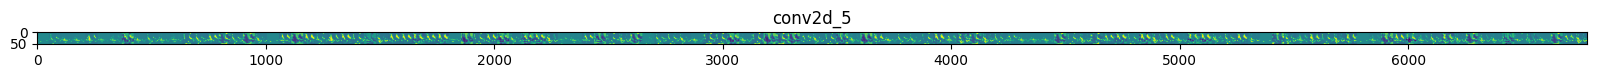

1/1 [==============================] - 0s 56ms/step


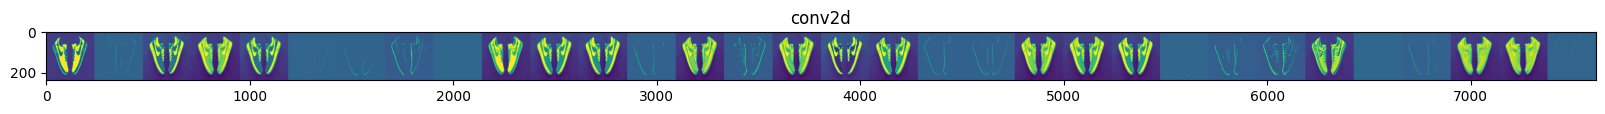

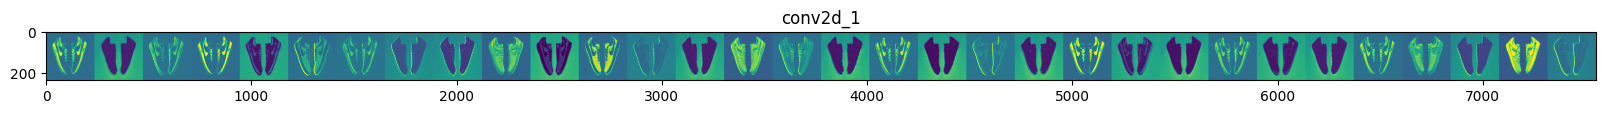

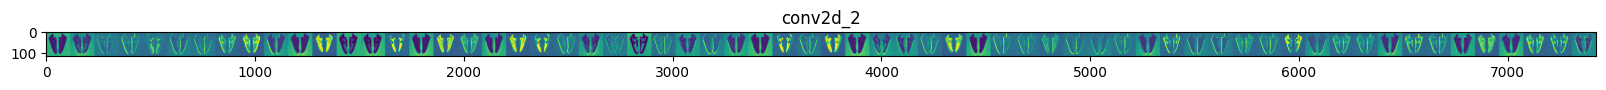

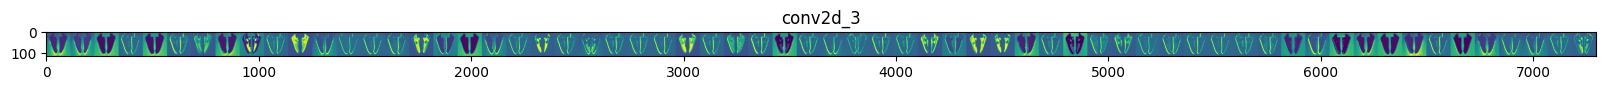

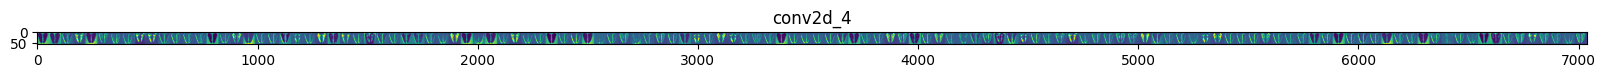

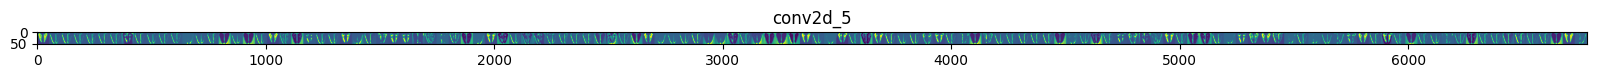

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define a new Model to visualize intermediate representations
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

def visualize_intermediate_representations(img_item):
  # Using a False positive image
  img = img_item
  img = img.reshape(1, *img.shape)
  # Obtain intermediate representations for the image
  successive_feature_maps = visualization_model.predict(img)

  # Retrieve the names of the layers
  layer_names = [layer.name for layer in model.layers]

  # Visualize the feature maps
  for layer_name, feature_map in zip(layer_names, successive_feature_maps):
      #print(feature_map.shape)
      if(not layer_name.startswith('conv')):
        continue
      if len(feature_map.shape) == 4:
          n_features = feature_map.shape[-1]  # Number of features in the feature map
          size = feature_map.shape[1]  # Feature map size (1, size, size, n_features)

          # Create a grid to display the feature maps
          display_grid = np.zeros((size, size * n_features))

          # Postprocess the features for visualization
          for i in range(n_features):
              x = feature_map[0, :, :, i]
              x -= x.mean()
              x /= x.std()
              x *= 64
              x += 128
              x = np.clip(x, 0, 255).astype('uint8')
              # Tile each filter into a horizontal grid
              display_grid[:, i * size: (i + 1) * size] = x

          # Display the grid
          scale = 20. / n_features
          plt.figure(figsize=(scale * n_features, scale))
          plt.title(layer_name)
          plt.grid(False)
          plt.imshow(display_grid, aspect='auto', cmap='viridis')
  plt.show()


# Run function for images
visualize_intermediate_representations(images_array[1])
visualize_intermediate_representations(images_array[14])

1/1 [==============================] - 0s 58ms/step


<ipython-input-12-90bae4466b3e>:34: RuntimeWarning: divide by zero encountered in divide
  x /= x.std()


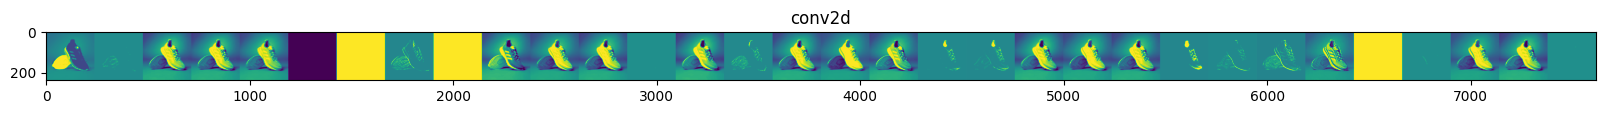

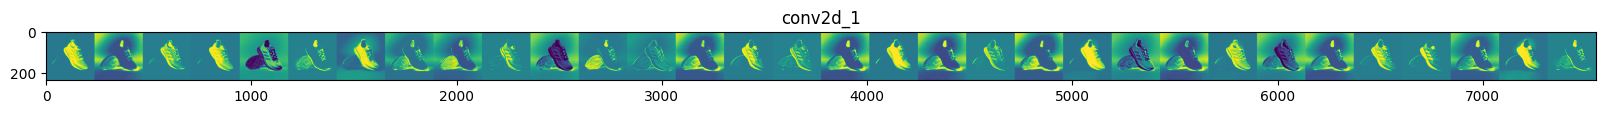

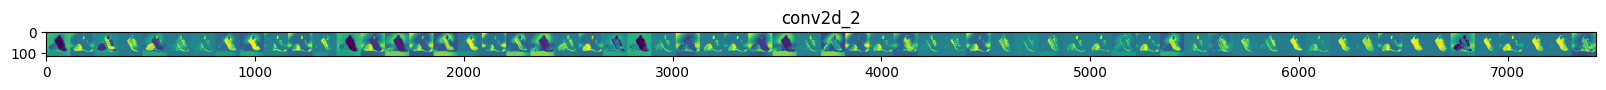

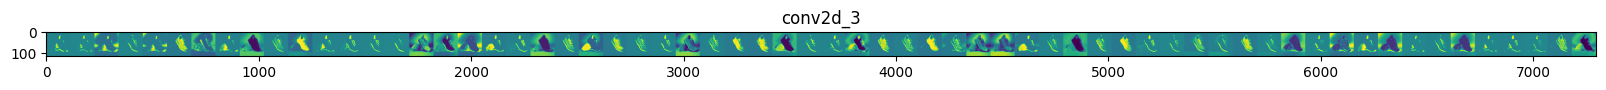

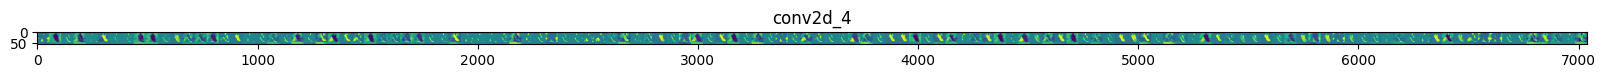

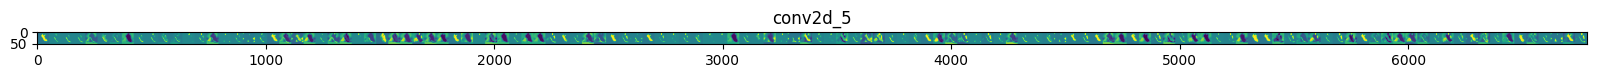

In [ ]:

visualize_intermediate_representations(images_array[23])

The image vignettes seem to be a prominent feature. They are common accross multiple AI images.

In [ ]:
! pip install keras-vis